# Statistical Modeling

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/fabian/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
# Warning is for package maintainers can be ignore for now

In [7]:
gapminder = pd.read_csv('05_02/gapminder.csv')

In [8]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [9]:
gdata = gapminder.query('year == 1985')

In [10]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe':'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving', 'babies_per_woman', c=colors, s=size, linewidths=0.5, edgecolor='k', alpha=0.5)

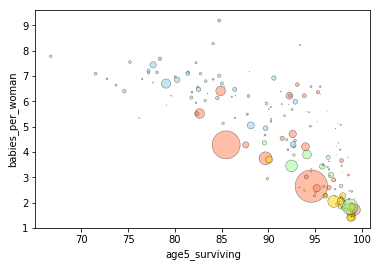

In [11]:
plotdata()

The package which we are going to use here is from the Python Package stats models - OLS - Ordinary Least Sqaures. Least squares means that models are fit by minimizing the sum of square differences between model predictions and observations. Furthermore, ordinary here means that the model coefficients appear lineally in the model formulas.

In [12]:
# babies_per_woman ~ age5_surviving - is an example of the usage here

In [13]:
model = smf.ols(formula = "babies_per_woman ~ 1", data  = gdata)

In mathematics, the tilde operator (Unicode U+223C), sometimes called "twiddle", is often used to denote an equivalence relation between two objects. Thus "x ~ y" means "x is equivalent to y". It is a weaker statement than stating that x equals y. The expression "x ~ y" is sometimes read aloud as "x twiddles y", perhaps as an analogue to the verbal expression of "x = y".

In statistics, the tilde is frequently used to mean "has the distribution (of)," for instance, X∼N(0,1) means "the stochastic (random) variable X has the distribution N(0,1) (the standard normal distribution). If X and Y are stochastic variables then X∼Y means "X has the same distribution as Y.

In [14]:
grandmean = model.fit()

In [15]:
grandmean

In [16]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata), c=colors, s=30, linewidths=0.5, edgecolors='k', marker='D')

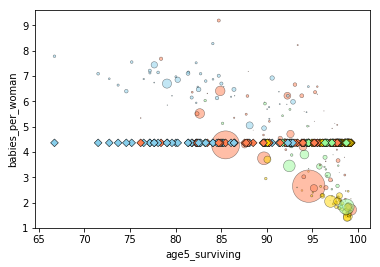

In [17]:
plotfit(grandmean)

In [18]:
grandmean.params

Intercept    4.360714
dtype: float64

This is known as intercept to group by means me add a model term which is added to the right of the formulation using a "+" symbol i.e. below we add region

In [19]:
gdata.babies_per_woman.mean() # This is the same as grandmean.params

4.360714285714285

In [20]:
groupmeans = model = smf.ols(formula = "babies_per_woman ~ 1 + region", data  = gdata).fit()

Using the statsmodels.formula.api model we are are able to calculate the mean using **babies_per_woman ~ 1**. We add **region** here which groups each into select criteria (shown in the graph below).

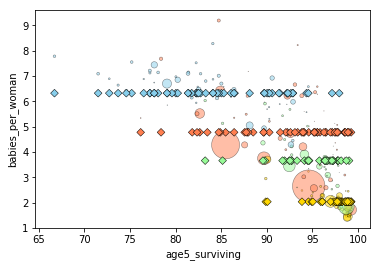

In [21]:
plotfit(groupmeans)

In [22]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [23]:
groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region", data  = gdata).fit()

Models **groupmeans = model = smf.ols(formula = "babies_per_woman ~ 1 + region", data  = gdata).fit()** and **groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region", data  = gdata).fit()** is the same however one offsets values where as the latter performs a complement so we have no requirement to subtract from the intercept.

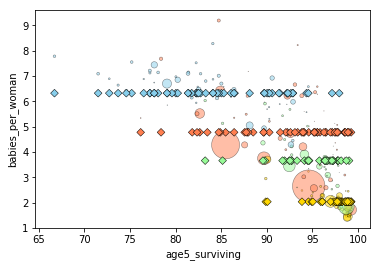

In [24]:
plotfit(groupmeans)

In [25]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [26]:
gdata.groupby('region').babies_per_woman.mean() # which once again is equal to groupmeans.params

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [27]:
surving = groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region + age5_surviving", data  = gdata).fit()

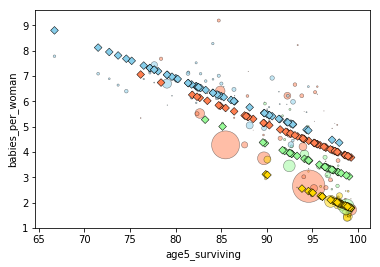

In [28]:
plotfit(surving)

With this we can create a model for surviving and plot this quite easily as shown above. The reason I state quite easliy is because the model is now using **mean (positive)**, **region** **surviving** variables.

In [29]:
surving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

age5_surviving tells us that for every additional percentage point of child survival to age five. The number of babies per woman decreases by 0.141886 (14%). 

In [30]:
surving_byregion = groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region + age5_surviving:region", data  = gdata).fit()

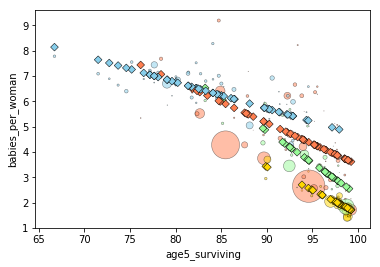

In [31]:
plotfit(surving_byregion)

A group terms is introduce using the plus symbol **+** where as an ineraction term is introduce using the colon symbol **:**

In [32]:
surving_byregion.params # This introduces interaction term of region to the contstant group terms

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [33]:
surving_byregion_population = groupmeans = model = smf.ols(formula = "babies_per_woman ~ -1 + region + age5_surviving:region + population", data  = gdata).fit()

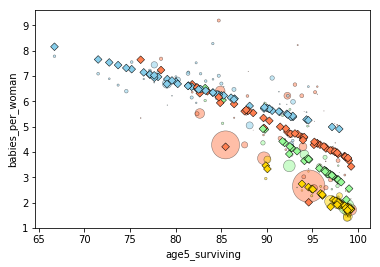

In [34]:
plotfit(surving_byregion_population) # This introduces interaction term of region and population to the contstant group terms

As there are outliers shown in relation to the large circles we add another interaction to fix this specifically population which shown below.

In [35]:
surving_byregion_population.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64